In [ ]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime

# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os

#출력 결과 청소하는 함수
from IPython.display import clear_output

In [ ]:
#요청할 페이지 주소
site= 'https://namu.wiki/RecentChanges'


In [ ]:
# 요청한다.
res = requests.get(site)
# html 데이터를 추출한다.
html = res.text
# bs4 객체를 생성한다.
soup = BeautifulSoup(html, 'lxml')
soup


<!DOCTYPE html>
<html data-n-head-ssr=""><head><title>최근 변경내역 - 나무위키</title><meta charset="utf-8" data-n-head="ssr"/><meta content="user-scalable=no, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0, width=device-width" data-n-head="ssr" name="viewport"/><meta content="ie=edge" data-n-head="ssr" http-equv="x-ua-compatible"/><meta content="the seed" data-n-head="ssr" name="generator"/><meta content="yes" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="나무위키" data-n-head="ssr" name="application-name"/><meta content="나무위키" data-n-head="ssr" name="msapplication-tooltip"/><meta content="/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8" data-n-head="ssr" name="msapplication-starturl"/><meta content="#008275" data-n-head="ssr" name="theme-color"/><meta content="noarchive" data-n-head="ssr" name="googlebot"/><link data-n-head="ssr" href="https://namu.wiki/RecentChanges" rel="canonical"/><link data-n-head="ssr" href="/opensearch.xml" rel="search" title="나무위키" typ

### 데이터를 수집한다.

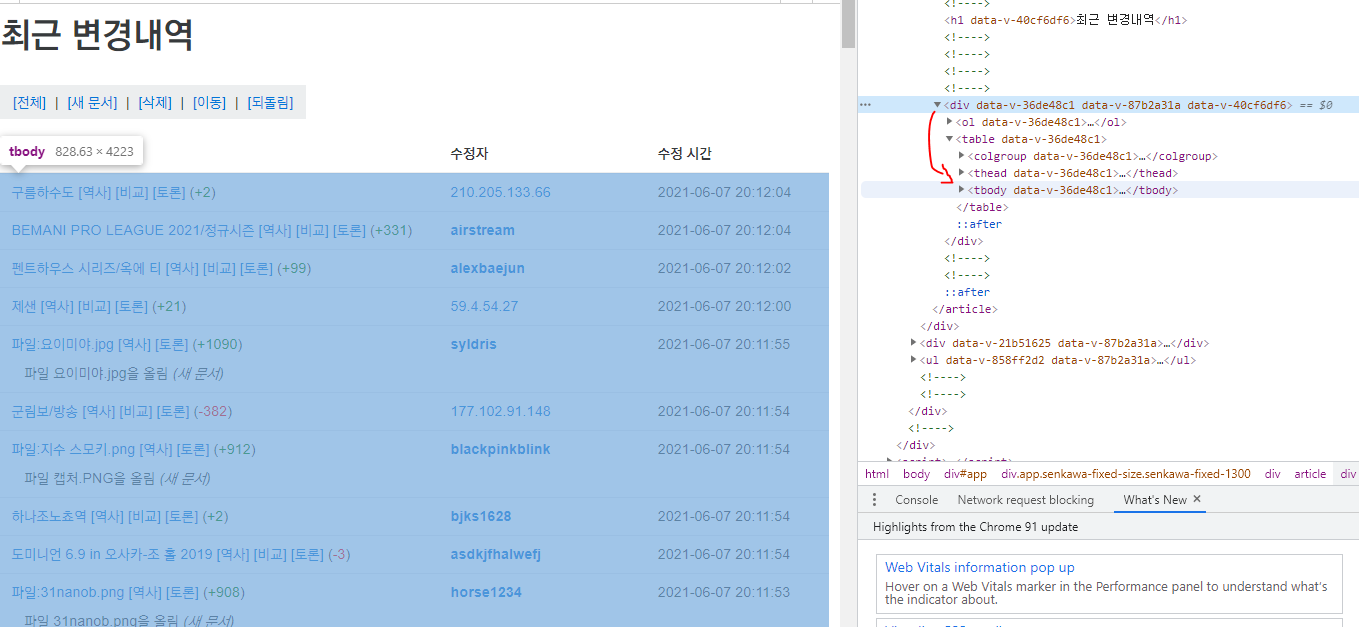

In [ ]:
#https://www.w3schools.com/cssref/css_selectors.asp

table_tag=soup.select_one('#app > div > div:nth-child(2) > article > div > table')
tbody_tag=table_tag.select_one('tbody')

tbody_tag


<tbody data-v-36de48c1=""><tr data-v-36de48c1=""><td data-v-36de48c1=""><a data-v-36de48c1="" href="/w/%EC%9C%A0%EB%85%B8(%EB%B8%94%EB%9E%99%20%ED%81%B4%EB%A1%9C%EB%B2%84)">유노(블랙 클로버)</a> <a data-v-36de48c1="" href="/history/%EC%9C%A0%EB%85%B8(%EB%B8%94%EB%9E%99%20%ED%81%B4%EB%A1%9C%EB%B2%84)">[역사]</a> <a data-v-36de48c1="" href="/diff/%EC%9C%A0%EB%85%B8(%EB%B8%94%EB%9E%99%20%ED%81%B4%EB%A1%9C%EB%B2%84)?rev=189&amp;oldrev=188">[비교]</a> <a data-v-36de48c1="" href="/discuss/%EC%9C%A0%EB%85%B8(%EB%B8%94%EB%9E%99%20%ED%81%B4%EB%A1%9C%EB%B2%84)">[토론]</a> <span data-v-36de48c1="">(<span class="p" data-v-36de48c1="" data-v-3ee54395="">+371</span>)</span></td> <td data-v-36de48c1=""><div class="v-popover" data-v-36de48c1="" data-v-38195e46=""><div aria-describedby="popover_hyu3zumdnm" class="trigger" style="display:inline-block;"><a class="u" data-v-38195e46="">mirmirr</a> </div> <div aria-hidden="true" class="tooltip popover vue-popover-theme" id="popover_hyu3zumdnm" style="visibility:hidden;

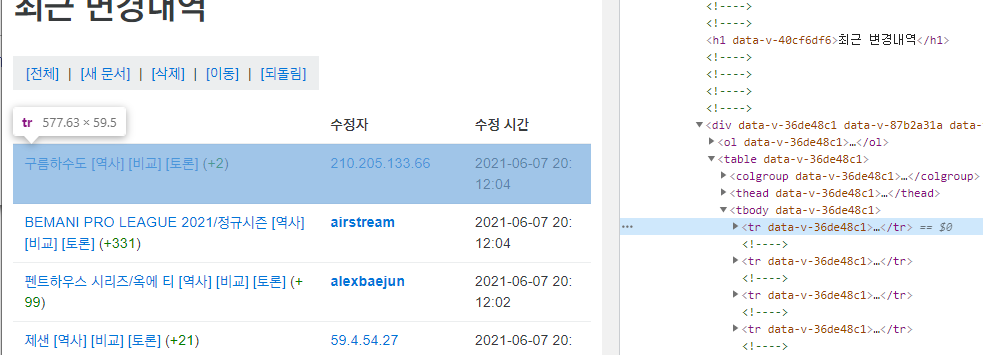

In [ ]:
# 그 다음 th 태그는 nth_child 부분이 있다.
# tr:nth-child(1)
# nth_child 는 같은 계층에 똑같은게 여러개 있으면 그것들을 구분하기 위한 인덱스를 설정하는 부분이다. 
#이런 경우에는 nth_child를 제거하면 모두 가져올 수 있다.

#app > div > div:nth-child(2) > article > div > table > tbody > tr:nth-child(1)
#app > div > div:nth-child(2) > article > div > table > tbody > 중복부분 삭제
# 모든 항목을 가져오기 위해 :nth-child(1) 삭제
tr_tag = tbody_tag.select('tr')

tr_tag


[<tr data-v-36de48c1=""><td data-v-36de48c1=""><a data-v-36de48c1="" href="/w/%EC%9C%A0%EB%85%B8(%EB%B8%94%EB%9E%99%20%ED%81%B4%EB%A1%9C%EB%B2%84)">유노(블랙 클로버)</a> <a data-v-36de48c1="" href="/history/%EC%9C%A0%EB%85%B8(%EB%B8%94%EB%9E%99%20%ED%81%B4%EB%A1%9C%EB%B2%84)">[역사]</a> <a data-v-36de48c1="" href="/diff/%EC%9C%A0%EB%85%B8(%EB%B8%94%EB%9E%99%20%ED%81%B4%EB%A1%9C%EB%B2%84)?rev=189&amp;oldrev=188">[비교]</a> <a data-v-36de48c1="" href="/discuss/%EC%9C%A0%EB%85%B8(%EB%B8%94%EB%9E%99%20%ED%81%B4%EB%A1%9C%EB%B2%84)">[토론]</a> <span data-v-36de48c1="">(<span class="p" data-v-36de48c1="" data-v-3ee54395="">+371</span>)</span></td> <td data-v-36de48c1=""><div class="v-popover" data-v-36de48c1="" data-v-38195e46=""><div aria-describedby="popover_hyu3zumdnm" class="trigger" style="display:inline-block;"><a class="u" data-v-38195e46="">mirmirr</a> </div> <div aria-hidden="true" class="tooltip popover vue-popover-theme" id="popover_hyu3zumdnm" style="visibility:hidden;display:none;" tabindex="

### 앞쪽에있는 링크 주소들을 추출
- td태그 추출 > a태그 추출
- a태그가 없으면 태그 내의 주소를 가져온다.

  
    if a_tag != None :
        # a 태그 내의 주소를 가져온다.
        href = a_tag.get('href')
       
        #수집된 주소를 담는다.
        link_list.append(href)

In [ ]:
# 링크 주소들을 담을 리스트
link_list = []

# 위에서 수집한 tr 태그의 수 만큼 반복한다.
for tr in tr_tag :
    # td 태그들을 추출한다.
    # td_list = tr.select('td')
    # td_tag = td_list[0]
    # 태그들 중에서 제일 처음것을 가지고 오고자 할 때는
    # select_one을 사용해도 된다.
    td_tag = tr.select_one('td')
    
    # td 태그에 있는 a 태그를 가져온다.
    a_tag = td_tag.select_one('a')
    
    # a_tag가 없을 수도 있기 때문에
    if a_tag != None :
        # a 태그 내의 주소를 가져온다.
        href = a_tag.get('href')
        #print(href)
        #수집된 주소를 담는다.
        link_list.append(href)

link_list





['/w/%EC%9C%A0%EB%85%B8(%EB%B8%94%EB%9E%99%20%ED%81%B4%EB%A1%9C%EB%B2%84)',
 '/w/%EC%99%B8%EA%B5%AD%EC%9D%B8%20%EC%84%A0%EC%88%98/%EC%97%AD%EB%8C%80%20%ED%94%84%EB%A1%9C%EB%86%8D%EA%B5%AC',
 '/w/%EC%BB%B4%ED%88%AC%EC%8A%A4',
 '/w/%ED%8C%8C%EC%9D%BC:attachment/g3_sapi_al_din.jpg',
 '/w/%EC%96%B4%EB%AA%BD%EC%96%B4%EC%8A%A4%20VR%20%EC%A2%80%EB%B9%84/%EC%8B%9C%EC%A6%8C%202',
 '/w/%EC%9D%B4%EC%9D%B4%EB%8B%A4%20%EC%9A%B0%EB%A7%88%EB%85%B8%EC%8A%A4%EC%BC%80',
 '/w/%ED%8C%8C%EC%9D%BC:%EC%9A%B8%EC%A7%84%EA%B5%B0%20CI_White.svg',
 '/w/%EC%95%88%ED%86%A0%EB%8B%88%EC%98%A4%20%EB%B8%94%EB%9E%91%EC%BD%94',
 '/w/%EC%9D%B4203(%ED%95%A8%EB%8C%80%20%EC%BB%AC%EB%A0%89%EC%85%98)',
 '/w/%EC%8B%A0%EC%A7%84%EB%B3%B4%EB%8B%B9',
 '/w/%ED%8C%8C%EC%9D%BC:%EC%B0%BD3-%EC%9D%B4%EA%B7%B8%EB%82%98%ED%8B%B0%EC%96%B4%EC%8A%A4.png',
 '/w/%EC%9E%84%ED%94%BC%EC%97%AD',
 '/w/%EC%84%9C%EC%9A%B8%20%EB%B2%84%EC%8A%A4%20742',
 '/w/%EC%95%A0%EB%8B%88%EB%A9%94%EC%9D%B4%EC%85%98%20%EA%B0%90%EB%8F%85',
 '/w/%ED%8C%8C%EC%9D%BC:%EC%

#### 글 제목
- 제목 클릭하고 들어가서 글 제목의 태그확인

#### 글 내용
- 밑의 모든내용을 담고있는 태그 추출
- 글 내용 태그들의 글을 추출해 하나의 문자열로 합쳐준다.

#### 제거하고 싶은 내용이 있을 떄
- 한개일 때


    content_text = content_text.replace('[1]', '')  

- 여러개 일때


    remove_text = ['[1]', '[2]', '[3]']
    for r1 in remove_text :
        content_text = content_text.replace(r1, '')  
    
#### 데이터프레임 생성
- dict로 틀을 만들어 주고 df1=pd.DataFrame(data_dict) 로 바꿔준다.

#### 요청한 주소를 저장



      with open('data/wiki_log.txt', 'a', encoding='utf-8-sig') as fp:
          fp.write(sub_url+ '\n')
          
      if isSaved == False :
          # 처음 저장
          df1.to_csv('data/wiki_data.csv', encoding='utf-8-sig', index=False)
          isSaved = True
      else :
          df1.to_csv('data/wiki_data.csv', encoding='utf-8-sig', index=False, header=False, mode='a')


    clear_output(wait=True)
    print('수집 완료')

In [ ]:
# 전에 생성된 파일을 제거한다.
if os.path.isfile('data/wiki_log.txt') :
    os.remove('data/wiki_log.txt')

if os.path.isfile('data/wiki_data.csv') :
    os.remove('data/wiki_data.csv')

# 처음 저장여부를 확인하기 위한 변수
isSaved = False
    
    
#수집된 주소의 수만큼 반복한다.
#for sub_url in link_list[:3] :
for sub_url in link_list :
    #딜레이
    time.sleep(1)

    
    clear_output(wait=True) #출력 결과를 지우고 출력하고 지우고 반복
   
    #요청할 주소
    site2=f'https://namu.wiki{sub_url}'
    print(f'수집중 : {site2}')
    
    #요청한다.
    res2 = requests.get(site2)
    soup2 = BeautifulSoup(res2.text, 'lxml')
    
    #글 제목
    # 제목 클릭하고 들어가서 글 제목의 태그확인
    title_tag = soup2.select_one('#app > div > div:nth-child(2) > article > h1 > a')
    title= title_tag.text
    
    # 글 내용
    # 밑의 모든내용을 담고있는 태그 추출
    content_tag = soup2.select('div.wiki-paragraph')

    # 글 내용 태그들의 글을 추출해 하나의 문자열로 합쳐준다.
    content_text = ''
    for content_tag2 in content_tag :
        content_text = content_text + content_tag2.text
        
    # 제거하고 싶은 것이 있다면 제거해준다.
    #content_text = content_text.replace('[1]', '')
    
    
    # 제거하고 싶은 것이 있다면 제거해준다.
    remove_text = ['[1]', '[2]', '[3]']
    for r1 in remove_text :
        content_text = content_text.replace(r1, '')

    print(content_text)

        
    

    
    #데이터프레임 생성
    data_dict={
        'titel' : [title],
        'content': [content_text]

    }
    
    df1=pd.DataFrame(data_dict)
    #display(df1)
    
    #요청한 주소를 저장한다.
    with open('data/wiki_log.txt', 'a', encoding='utf-8-sig') as fp:
        fp.write(sub_url+ '\n')
   

    if isSaved == False :
        # 처음 저장
        df1.to_csv('data/wiki_data.csv', encoding='utf-8-sig', index=False)
        isSaved = True
    else :
        df1.to_csv('data/wiki_data.csv', encoding='utf-8-sig', index=False, header=False, mode='a')


clear_output(wait=True)
print('수집 완료')


수집 완료


In [ ]:
df100=pd.read_csv('data/wiki_data.csv')
df100

,titel,content
0,유노(블랙 클로버),ユノ 유노[풀네임] Yuno공식 프로필애니메이션성별남자출신하지 마을 진짜 출신지스페...
1,외국인 선수/역대 프로농구,상위 문서: 외국인 선수1. 소개2. 초기 드래프트 선발 (1997~2004)...
2,컴투스,주식회사 컴투스 Com2uS Corporation대표자 송병준 계열사 게임빌 그룹...
3,파일:attachment/g3_sapi_al_din.jpg,NaN
4,어몽어스 VR 좀비/시즌 2,상위 문서: 어몽어스 VR 좀비1. 개요1.1. 1화1.2. 2화1.3. 3화...
...,...,...
94,젠데이아,젠데이아의 주요 수상 이력 [ 펼치기 · 접기 ] 역대 에미상 시상식 여우...
95,파일:attachment/shivan_nightmareS.png,NaN
96,브륀힐드(오우거 배틀 사가),북유럽 신화의 등장인물은 브륀힐드 문서로.ブリュンヒルド게임 《전설의 오우거 배틀》과...
97,어몽어스 VR 좀비/시즌 2,상위 문서: 어몽어스 VR 좀비1. 개요1.1. 1화1.2. 2화1.3. 3화...


In [ ]:
df100.isna().sum()

titel      0
content    7
dtype: int64